# Statistical Pattern Recognition - Solution 4: Nonparametric methods

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


## $\star$ Part 1: K-nearest neighbors

Load the data from dataset.npz and split it evenly into a training set
and a test set. 

Each sample consists of a point in 2D and a class label
$\{1,2,3\}$.

For each point in the test set, predict its label by a k-nearest
neighbor classifier “trained” using the training set. 

Compute the **average classification error** using the true labels of the test set. 

Visualize the training and test points with their respective label, as well as the classifier's decision boundary using a **contour plot** (see example at the bottom).

Repeat for different values of k.


In [27]:

# load the data and split it into train and test sets
# START TODO ################
data = np.load("../data/dataset.npz")

data = data['arr_0']

data_train, data_test = train_test_split(data, test_size=0.5, random_state=42)
# END TODO ################

# check that the data and the split shapes are correct
# START TODO ################
# here we check whether the data is equally split
# between test and train sets
print(data_train.shape, data_test.shape)


# END TODO ################


(140, 3) (140, 3)


Accuracy for k=5: 0.86


/tmp/ipykernel_2883/2518856164.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_test[:, 0], data_test[:, 1], c=data_test[:, -1], edgecolor='k', marker='x', label='Test Data', cmap=cmap_bold)


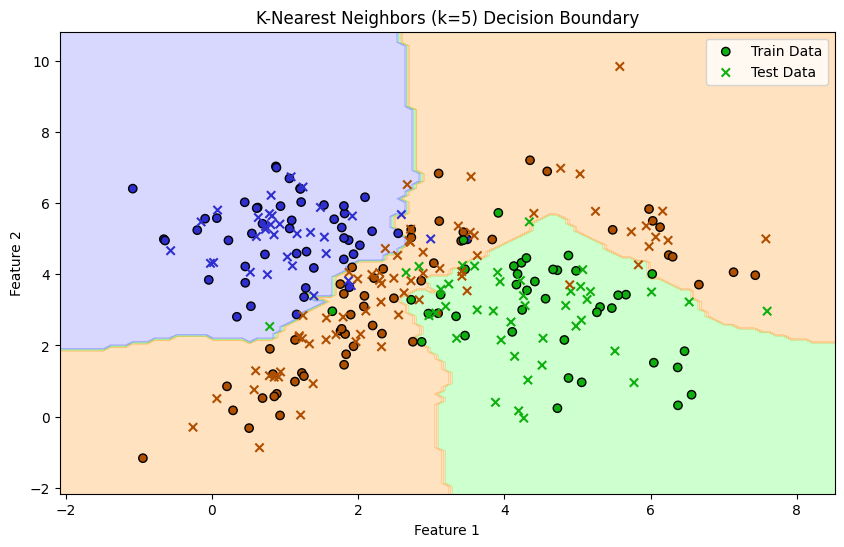

In [ ]:
# train and plot the k-nearest neighbors classifier
def plot_k_neighbors(k, data_train, data_test, classifier=KNeighborsClassifier, title = None):
    """
    k: Number of neighbors to use
    data_train: subsection of the dataset that is to be used for training
    data_test subsection of the dataset that is to be used for testing

    For more information on the KNeighborsClassifier see:
    https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    """
    # START TODO ################
    model = classifier(n_neighbors=k)
    model.fit(data_train[:, :-1], data_train[:, -1])
    y_pred = model.predict(data_test[:, :-1])
    accuracy = metrics.accuracy_score(data_test[:, -1], y_pred)
    print(f"Accuracy for k={k}: {accuracy:.2f}")
    # create a mesh grid for plotting decision boundaries
    # create a meshgrid depending on data range
    h = 0.1  # step size in the mesh
    x_min, x_max = min(data_train[:, 0].min(),data_test[:, 0].min()) - 1, max(data_train[:, 0].max(),data_test[:, 0].max()) + 1
    y_min, y_max = min(data_train[:, 1].min(),data_test[:, 1].min()) - 1, max(data_train[:, 1].max(),data_test[:, 1].max()) + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#ff9f2f', '#5fff5f', '#7f7fff'])
    cmap_bold = ListedColormap(['#af4f00', '#0faf0f', '#2f2fcf'])

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    plt.scatter(data_train[:, 0], data_train[:, 1], c=data_train[:, -1], edgecolor='k', marker='o', label='Train Data', cmap=cmap_bold)
    plt.scatter(data_test[:, 0], data_test[:, 1], c=data_test[:, -1], edgecolor='k', marker='x', label='Test Data', cmap=cmap_bold)
    if title == None:
        plt.title(f'K-Nearest Neighbors (k={k}) Decision Boundary')
    else:
        plt.title(title)
   
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

    # END TODO ################

plot_k_neighbors(5, data_train, data_test)


In [ ]:
# test for different values of K
for k in range(1, 8):
    plot_k_neighbors(k, data_train, data_test)
    plt.show()


## $\star$ Part 2: Data splits and hyperparameters

Study how different dataset splits and values of k affect classification results.

### Part 2.1
Train and display k-nearest-neighbor models for different *equally sized* splits of the set into training and test set. Use fixed k=4.

Is the classification error always the same?

In [ ]:
# fix K=4 and check how different random data splits change the result
# START TODO ################
model = KNeighborsClassifier(n_neighbors=4)
for i in range(40,5):
    data_train, data_test = train_test_split(data, test_size=0.5, random_state=i)
    
    model.fit(data_train[:, :-1], data_train[:, -1])
    y_pred = model.predict(data_test[:, :-1])
    accuracy = metrics.accuracy_score(data_test[:, -1], y_pred)
    print(f"Accuracy for k=4, Random split {i+1} : {accuracy:.2f}")
    
# END TODO ################


Accuracy for k=4, Random split 1 : 0.88
Accuracy for k=4, Random split 2 : 0.84
Accuracy for k=4, Random split 3 : 0.89
Accuracy for k=4, Random split 4 : 0.90
Accuracy for k=4, Random split 5 : 0.89
Accuracy for k=4, Random split 6 : 0.82
Accuracy for k=4, Random split 7 : 0.84
Accuracy for k=4, Random split 8 : 0.86
Accuracy for k=4, Random split 9 : 0.88
Accuracy for k=4, Random split 10 : 0.87
Accuracy for k=4, Random split 11 : 0.86
Accuracy for k=4, Random split 12 : 0.87
Accuracy for k=4, Random split 13 : 0.84
Accuracy for k=4, Random split 14 : 0.84
Accuracy for k=4, Random split 15 : 0.89
Accuracy for k=4, Random split 16 : 0.87
Accuracy for k=4, Random split 17 : 0.89
Accuracy for k=4, Random split 18 : 0.84
Accuracy for k=4, Random split 19 : 0.88
Accuracy for k=4, Random split 20 : 0.88
Accuracy for k=4, Random split 21 : 0.89
Accuracy for k=4, Random split 22 : 0.86
Accuracy for k=4, Random split 23 : 0.85
Accuracy for k=4, Random split 24 : 0.85
Accuracy for k=4, Random 

### Part 2.2
Train and display k-nearest-neighbor models for differently sized train/test splits. Use fixed k=4.

How does the classification error change?

Accuracy for k=4: 0.84


/tmp/ipykernel_2883/2518856164.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_test[:, 0], data_test[:, 1], c=data_test[:, -1], edgecolor='k', marker='x', label='Test Data', cmap=cmap_bold)


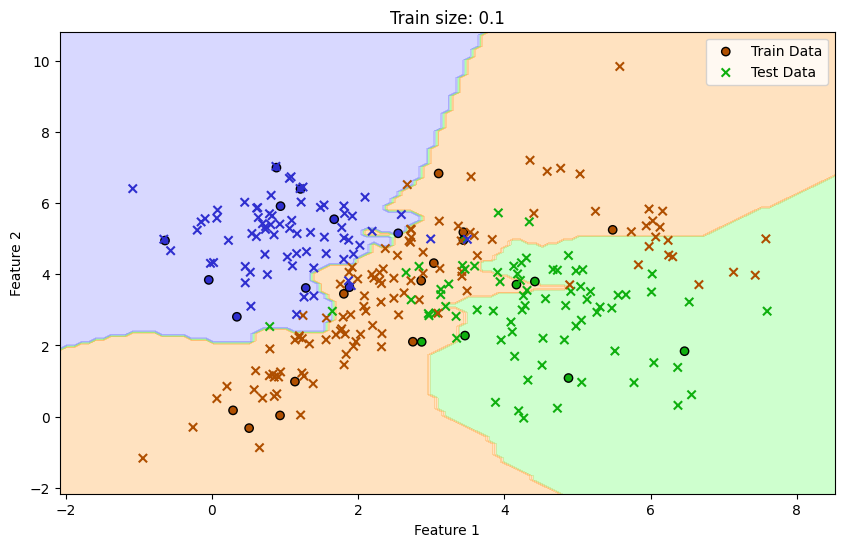

Accuracy for k=4: 0.87


/tmp/ipykernel_2883/2518856164.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_test[:, 0], data_test[:, 1], c=data_test[:, -1], edgecolor='k', marker='x', label='Test Data', cmap=cmap_bold)


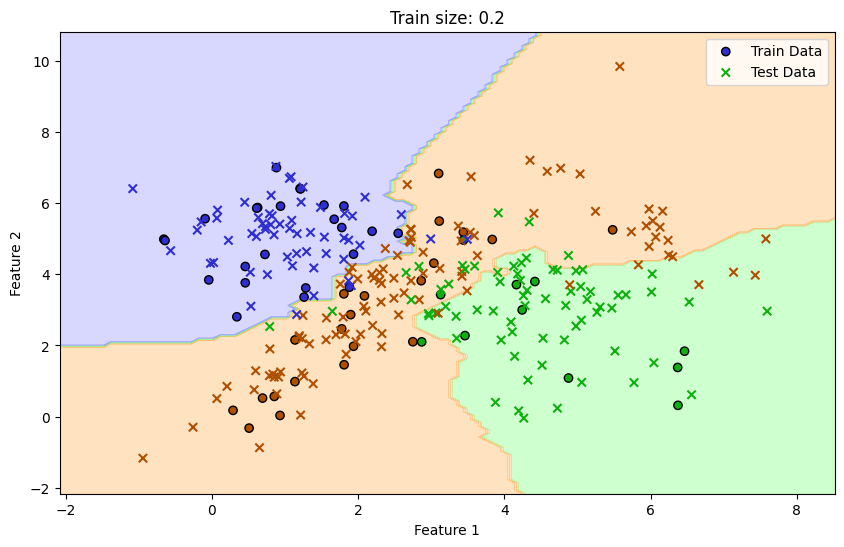

Accuracy for k=4: 0.87


/tmp/ipykernel_2883/2518856164.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_test[:, 0], data_test[:, 1], c=data_test[:, -1], edgecolor='k', marker='x', label='Test Data', cmap=cmap_bold)


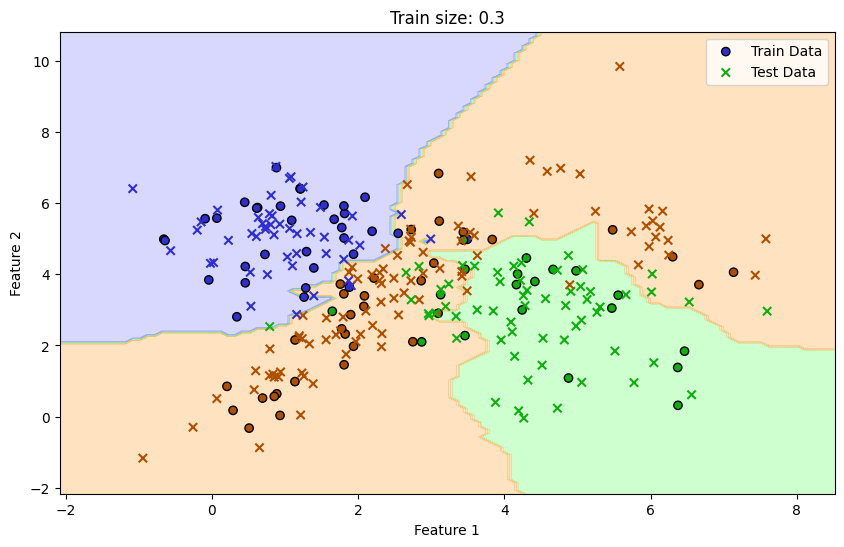

Accuracy for k=4: 0.86


/tmp/ipykernel_2883/2518856164.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_test[:, 0], data_test[:, 1], c=data_test[:, -1], edgecolor='k', marker='x', label='Test Data', cmap=cmap_bold)


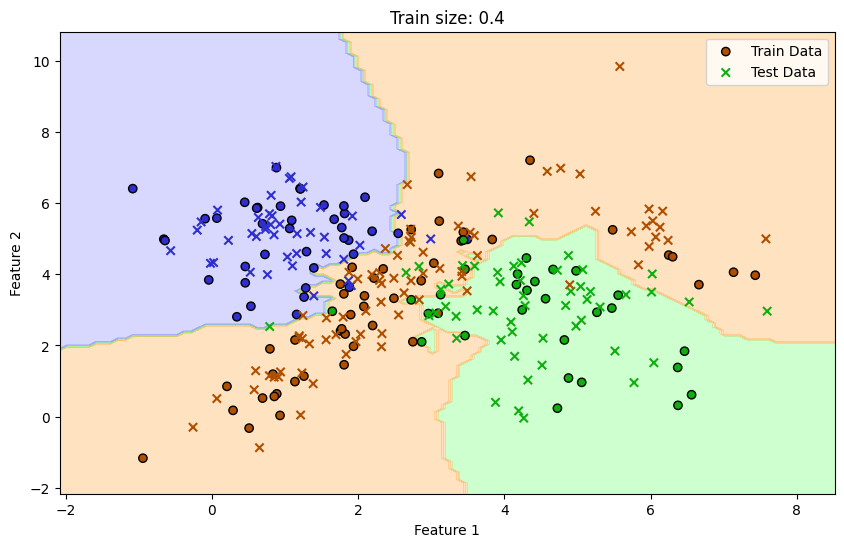

Accuracy for k=4: 0.87


/tmp/ipykernel_2883/2518856164.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_test[:, 0], data_test[:, 1], c=data_test[:, -1], edgecolor='k', marker='x', label='Test Data', cmap=cmap_bold)


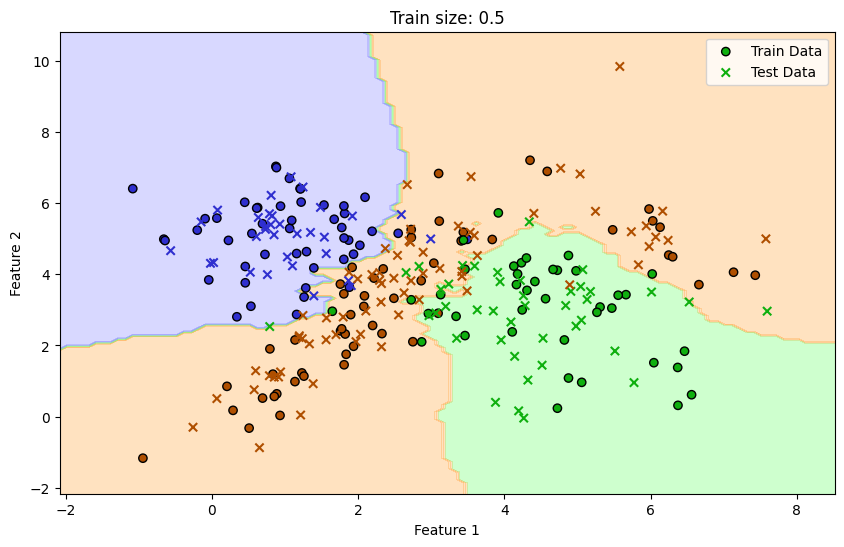

Accuracy for k=4: 0.85


/tmp/ipykernel_2883/2518856164.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_test[:, 0], data_test[:, 1], c=data_test[:, -1], edgecolor='k', marker='x', label='Test Data', cmap=cmap_bold)


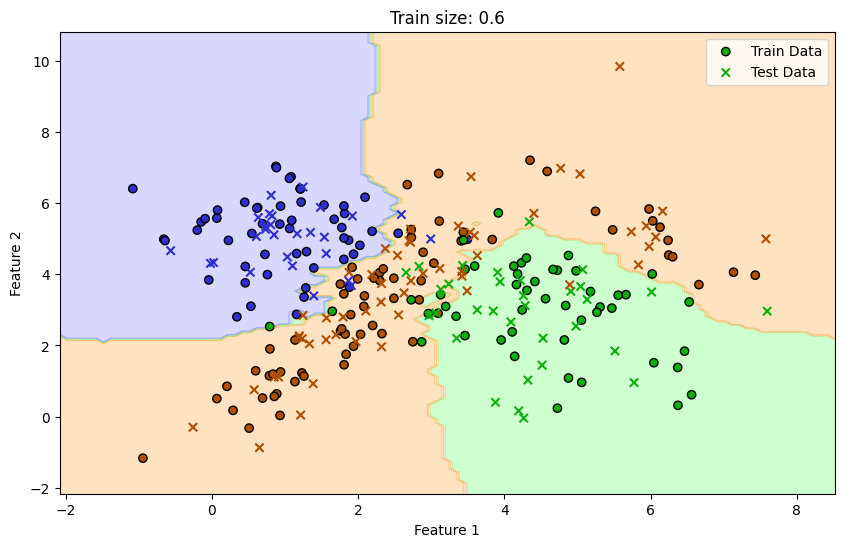

Accuracy for k=4: 0.86


/tmp/ipykernel_2883/2518856164.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_test[:, 0], data_test[:, 1], c=data_test[:, -1], edgecolor='k', marker='x', label='Test Data', cmap=cmap_bold)


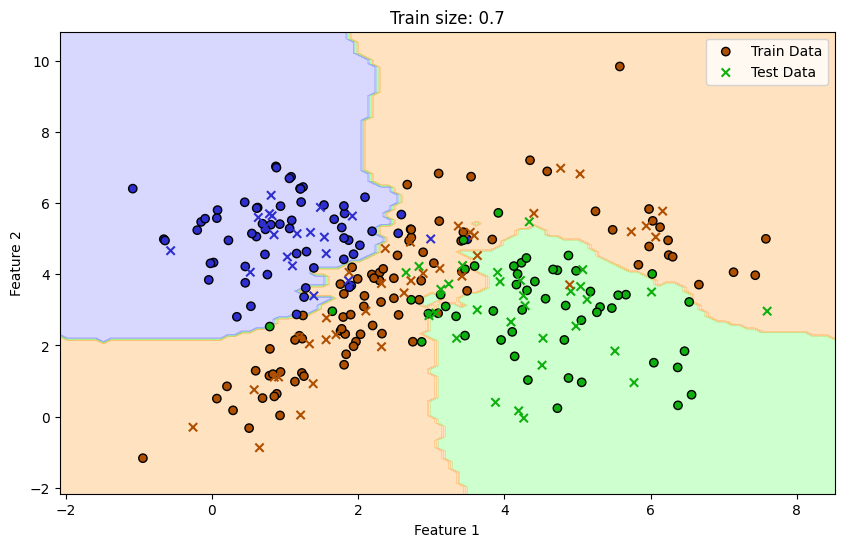

Accuracy for k=4: 0.89


/tmp/ipykernel_2883/2518856164.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_test[:, 0], data_test[:, 1], c=data_test[:, -1], edgecolor='k', marker='x', label='Test Data', cmap=cmap_bold)


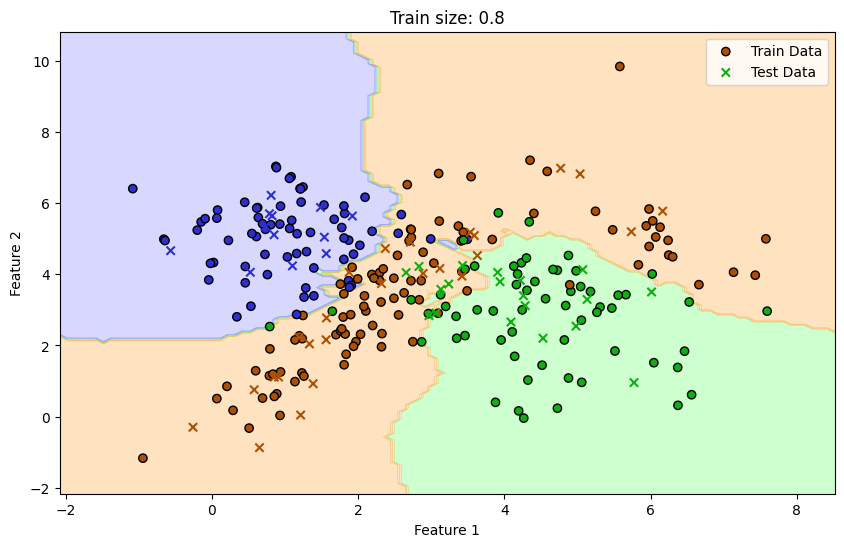

Accuracy for k=4: 0.96


/tmp/ipykernel_2883/2518856164.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_test[:, 0], data_test[:, 1], c=data_test[:, -1], edgecolor='k', marker='x', label='Test Data', cmap=cmap_bold)


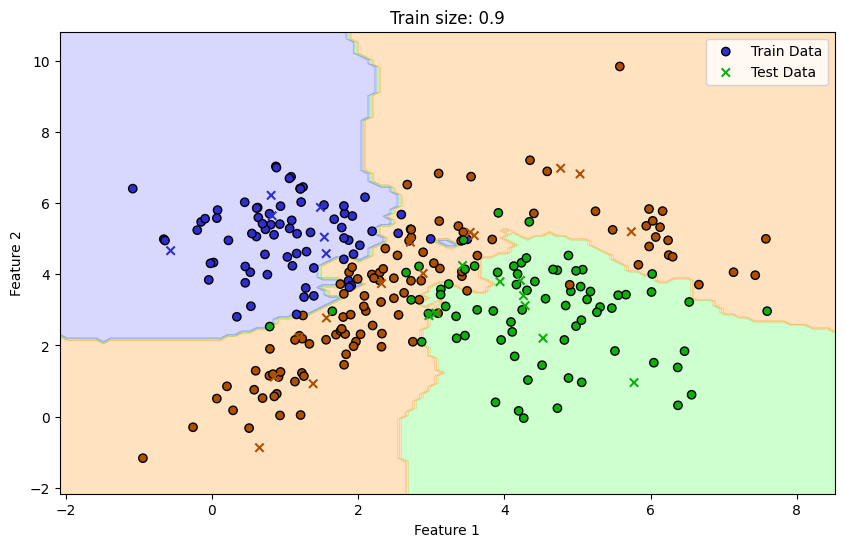

In [51]:
# fix K=4 and check how different training set sizes change the result
# START TODO ################
for train_size in np.arange(0.1, 1.0, 0.1):
    data_train, data_test = train_test_split(data, train_size=train_size, random_state=42)
    
    plot_k_neighbors(4, data_train, data_test, title = "Train size: {:.1f}".format(train_size))
    
    plt.show()
    
# END TODO ################


### Part 2.3
Compute and plot the classification error for different values of k, averaged over multiple *equally sized* splits.

How is the mean error affected by k?

What you should observe is an effect illustrating the so-called bias-variance tradeoff and will be discussed in more detail in the next class.

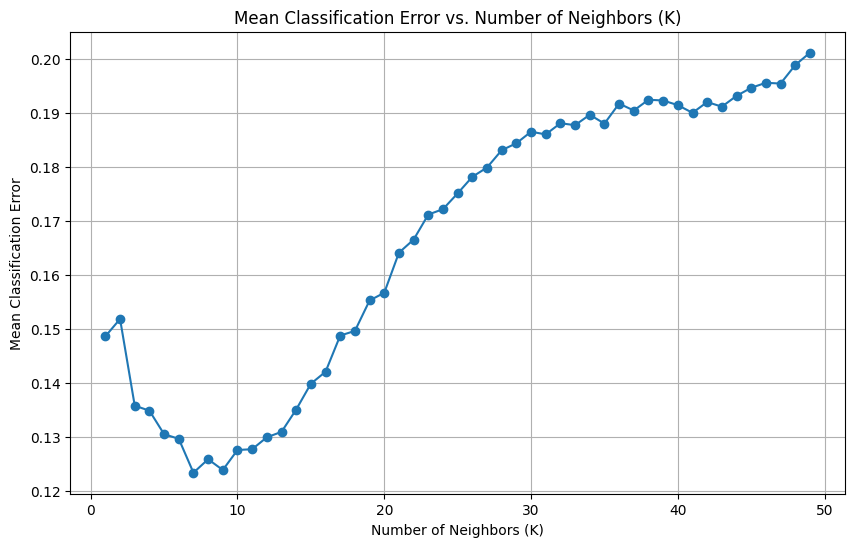

In [55]:
def get_classification_errors(data, k, n_trials):
    '''
    Run n_trials experiments with different (equally sized) train-test splits.
    Return a list of classification errors for each run.
    '''
    errors = []
    # START TODO ################
    for i in range(n_trials):
        data_train, data_test = train_test_split(data, test_size=0.5, random_state=i)
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(data_train[:, :-1], data_train[:, -1])
        y_pred = model.predict(data_test[:, :-1])
        accuracy = metrics.accuracy_score(data_test[:, -1], y_pred)
        error = 1 - accuracy
        errors.append(error)
        
    # END TODO ################
    return errors

ks = range(1, 50)
n_trials = 100
errors = []

# compute the mean classification error for each value of K and plot it as a function of K
# START TODO ################
for k in ks:
    error = get_classification_errors(data, k, n_trials)
    errors.append(np.mean(error))

# plot the mean classification error as a function of K
plt.figure(figsize=(10, 6))
plt.plot(ks, errors, marker='o')
plt.title('Mean Classification Error vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Classification Error')
plt.grid()
plt.show()
# END TODO ################


## $\star\star\star$ Bonus part: Custom KNN estimator

Implement the same functionality as `KNeighborsClassifier`.

For this, you can create a new class `SimpleKNeighborsClassifier` and implement the methods `__init__`, `fit` and `predict`.

The general idea is to:

* Convert the class labels from {1, 2, 3} to {0, 1, 2}
* Convert the integer classes to [onehot vectors](https://en.wikipedia.org/wiki/One-hot#Machine_learning_and_statistics).
* Compute the distance from all test points to all training points.
* For each test point, sort the training points by ascending distance, only keep the top k datapoints, average the class probabilities of those k points and predict the class with the highest probability.
* Convert the classes back from {0, 1, 2} to {1, 2, 3}

Check if your estimator produces the same results as the estimator from `sklearn`.


### One-hot utility function

In [ ]:
def get_onehot_matrix(targets:np.ndarray, num_classes:int):
    # START TODO ################
    # targets shape (n_datapoints)
    # we want a matrix of shape (n_datapoints, num_classes) s. t.
    # entry[n, cls] = 1 if targets[n] == cls else 0
    raise NotImplementedError
    # END TODO ################

# test the onehot function with mockup targets
example_targets = np.array([1.,3.,0.])
num_classes = 5
example_onehot = get_onehot_matrix(
    example_targets, num_classes)

print(f"Given targets {example_targets} and {num_classes} classes,"
      "\nresulting onehot matrix is:\n"
      f"{example_onehot}")


In [ ]:
class SimpleKNeighborsClassifier:
    # START TODO ################
    raise NotImplementedError
    # END TODO ################


In [ ]:
print("---------- Custom implementation:")
plot_k_neighbors(4, data_train, data_test,
                 classifier=SimpleKNeighborsClassifier)
print()
print("---------- Implementation from sklearn:")
plot_k_neighbors(4, data_train, data_test,
                 classifier=KNeighborsClassifier)


## Hints

### Example output for Part 1

![example output](ex4_example_output.jpg)


### Creating contour plots

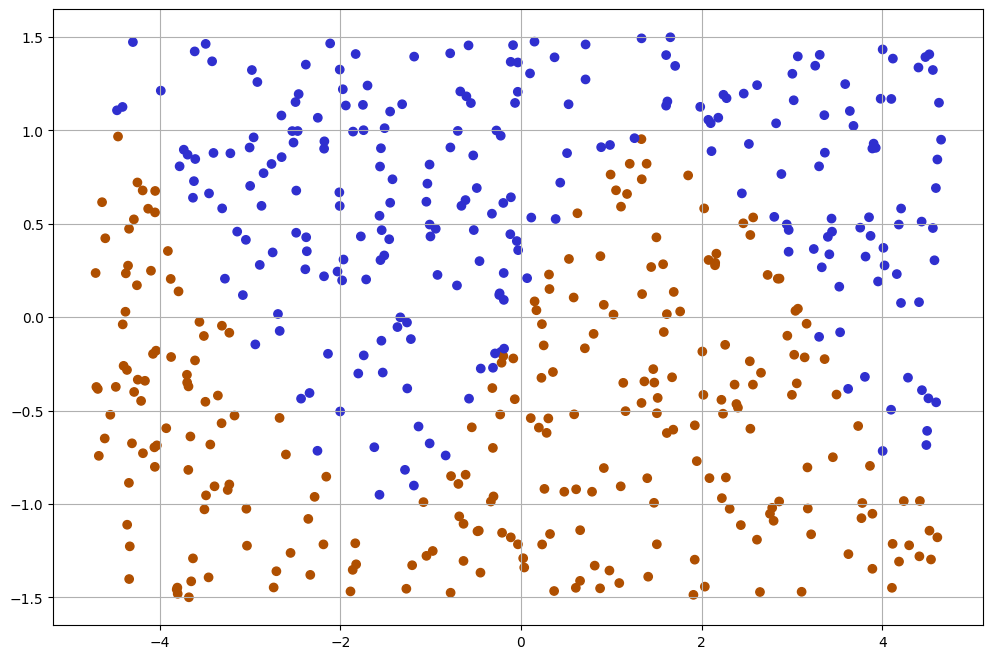

In [21]:
### Creating contour plots

# create custom colormaps
cmap_light = ListedColormap(['#ff9f2f', '#5fff5f', '#7f7fff'])
cmap_bold = ListedColormap(['#af4f00', '#0faf0f', '#2f2fcf'])

# create some example data in sine form
data = np.random.uniform(-1.5, 1.5, size=(500,2))
data[:, 0] *= 3.14
x, y = data[:, 0], data[:, 1]

# set data classes with sine as border
y_border = np.sin(data[:, 0])
classes = (y > y_border).astype(float)

# plot points colored by classes with the created colormap
plt.figure(figsize=(12,8))
plt.scatter(data[:, 0], data[:, 1], c=classes, cmap=cmap_bold)
plt.grid()
plt.show()


xrange.shape=(478,), yrange.shape=(160,)
xx.shape=(160, 478), yy.shape=(160, 478)


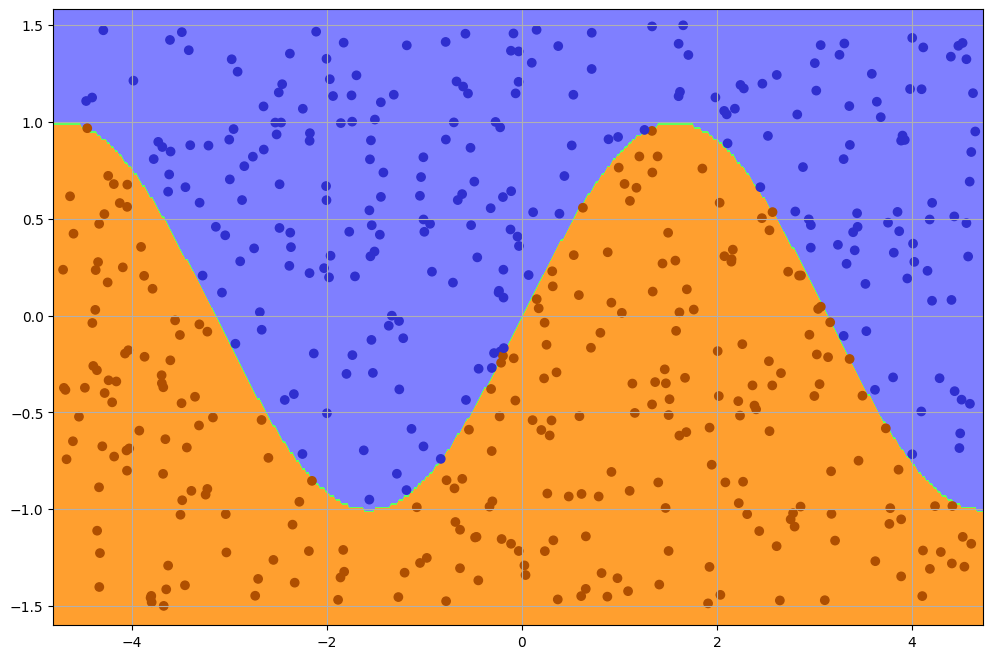

In [22]:
# create a meshgrid depending on data range
bordersize = .1
x_min, x_max = x.min() - bordersize, x.max() + bordersize
y_min, y_max = y.min() - bordersize, y.max() + bordersize

grid_size = .02
xrange = np.arange(x_min, x_max, grid_size)
yrange = np.arange(y_min, y_max, grid_size)
print(f"{xrange.shape=}, {yrange.shape=}")

xx, yy = np.meshgrid(xrange, yrange)
print(f"{xx.shape=}, {yy.shape=}")

# now xx maps from pixel position i, j to position x in the data

# classify each point in the meshgrid
zz = (yy > np.sin(xx)).astype(float)

# plot the contour of the true class distribution and the samples
plt.figure(figsize=(12,8))
plt.contourf(xx, yy, zz, cmap=cmap_light)
plt.scatter(data[:, 0], data[:, 1], c=classes, cmap=cmap_bold)
plt.grid()
plt.show()


### Handling data shapes

The sklearn predictor expects input of shape `(datapoints, features)`. To input your meshgrid, use `np.reshape` to flatten both `xx` and `yy` and then use `np.stack` to stack them in the last axis. Finally `reshape` the predictor's output back to your meshgrid shape and you can plot the contour.


### Inplace modification in numpy

Be mindful of whether you are working with *copies* or *views* of your data.

Comparison of copying and inplace modification in numpy:


In [ ]:
print(f"---------- Numpy ----------")
a = np.array([5])
b = a
b = b - 1
print(f"Copy:    {a} {b}")

a = np.array([5])
b = a
b -= 1
print(f"Inplace: {a} {b}")

print(f"---------- Python ----------")
a = 5
b = a
b = b - 1
print(f"Copy:    {a} {b}")

a = 5
b = a
b -= 1
print(f"Inplace: {a} {b}")
